In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("wine_data.csv", header = None, usecols = [0, 1, 2])
df.columns = ['Class_label', 'Alcohol', 'Malic_acid']

In [3]:
df.head()

,Class_label,Alcohol,Malic_acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


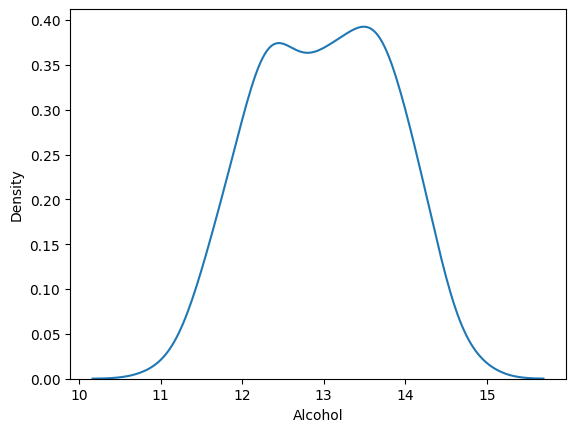

In [4]:
sns.kdeplot(df['Alcohol'])
plt.show()

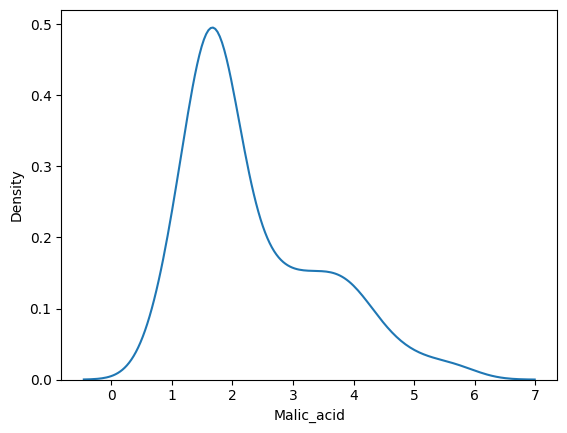

In [5]:
sns.kdeplot(df['Malic_acid'])
plt.show()

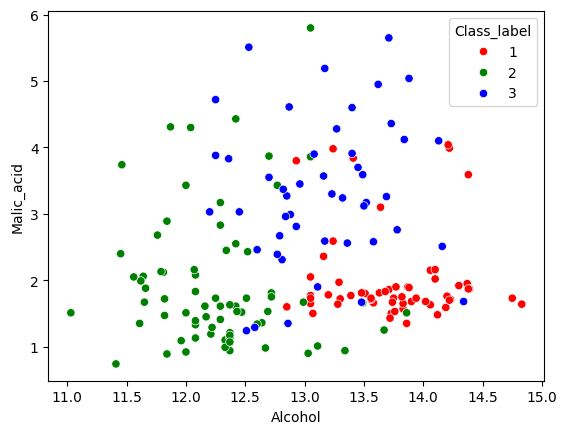

In [7]:
color_dict = {1:'red', 2:'green', 3:'blue'}
sns.scatterplot(x = df['Alcohol'], y = df['Malic_acid'], hue=df['Class_label'], palette=color_dict)
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop("Class_label", axis=1),
                                                    df['Class_label'], test_size=0.3, random_state=42)

In [10]:
X_train.shape, X_test.shape

((124, 2), (54, 2))

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#fit the scaler to the train set, it will learn the parameter
scaler.fit(X_train)

#transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [18]:
np.round(X_train.describe(), 1)

,Alcohol,Malic_acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.3,1.6
50%,12.9,1.9
75%,13.7,3.2
max,14.8,5.8


In [19]:
np.round(X_train_scaled.describe(), 1)

,Alcohol,Malic_acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.3,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


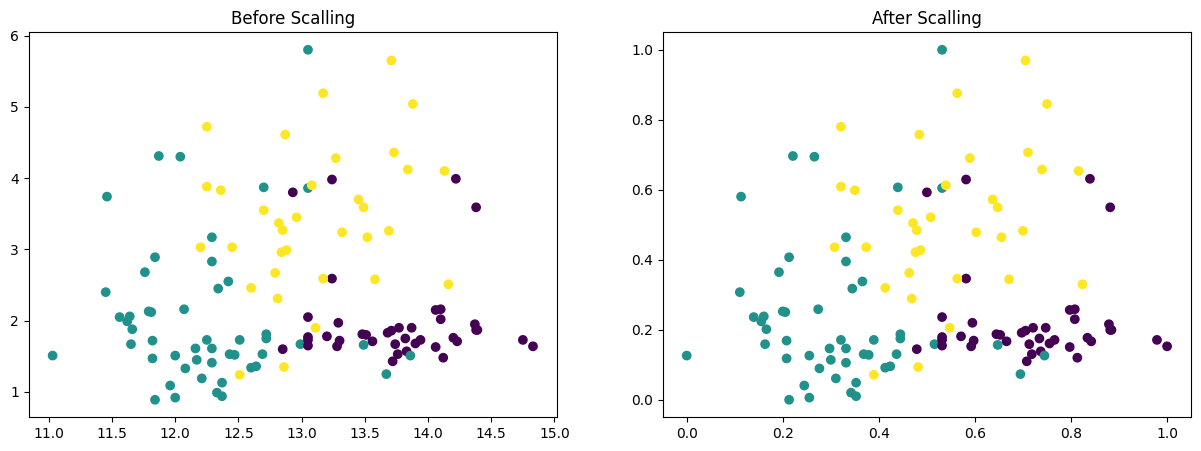

In [21]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (15, 5))
#scatter plot before scalling
ax1.scatter(x=X_train['Alcohol'], y=X_train['Malic_acid'], c = y_train)
ax1.set_title("Before Scalling")

#scatter plot after scalling
ax2.scatter(x=X_train_scaled['Alcohol'], y=X_train_scaled['Malic_acid'], c=y_train)
ax2.set_title("After Scalling")
plt.show()

As we can see, before and after normalization, nothing is changed but the data uses common scale.

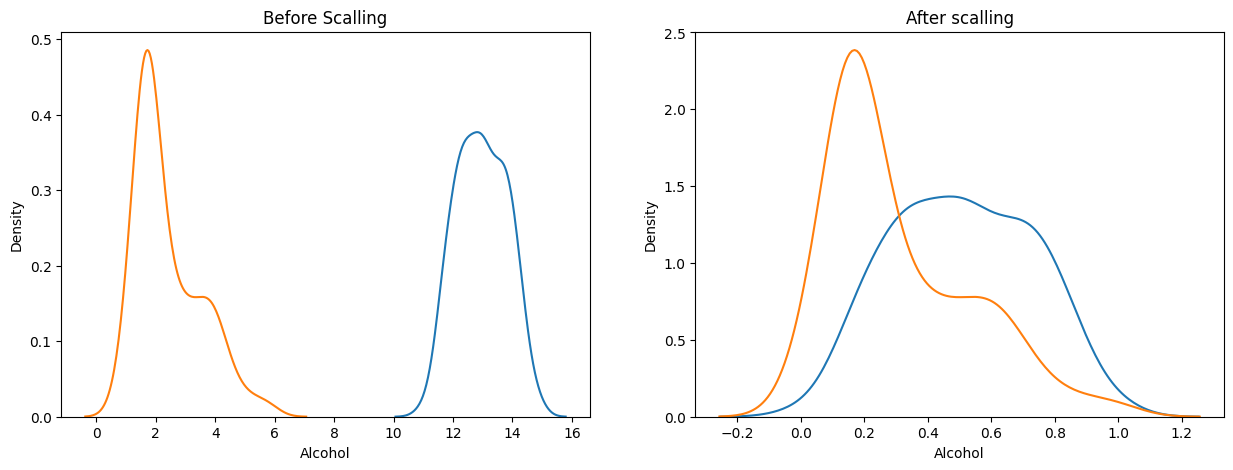

In [23]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (15, 5))

#before scalling
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic_acid'], ax=ax1)
ax1.set_title("Before Scalling")

#after scalling
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic_acid'], ax=ax2)
ax2.set_title("After scalling")

plt.show()

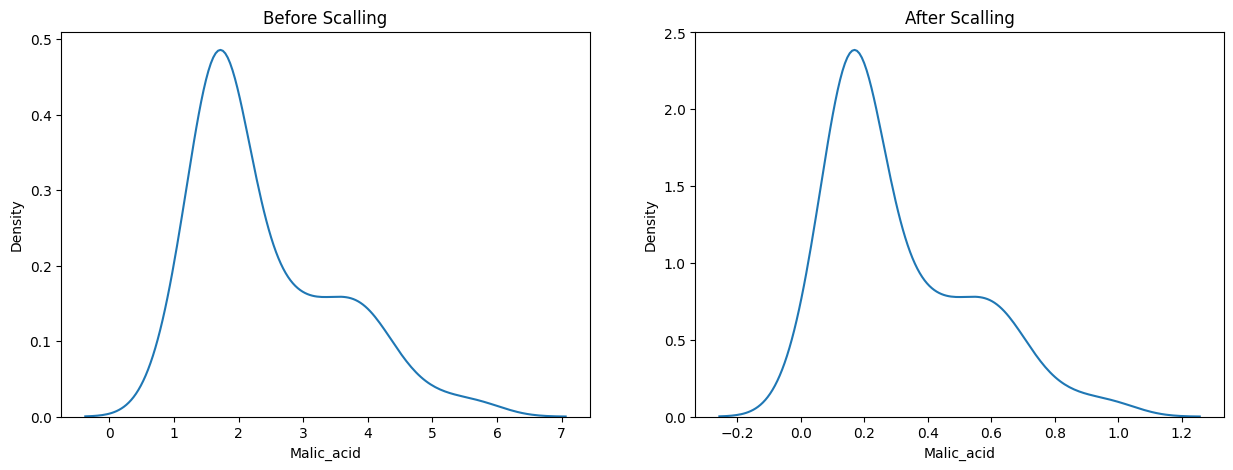

In [24]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (15, 5))

#Before scalling
sns.kdeplot(X_train['Malic_acid'], ax=ax1)
ax1.set_title("Before Scalling")

#After scalling
sns.kdeplot(X_train_scaled['Malic_acid'], ax=ax2)
ax2.set_title("After Scalling")
plt.show()